<center>
<h2><b>Muhammad Abdullah</b></h2>
</center>


<h1>. Data Collection and Preprocessing:</h1>

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('ObesityDataSet.csv')

print(data.sample(5))

      Gender        Age    Height     Weight family_history_with_overweight  \
354   Female  17.000000  1.600000  59.000000                             no   
96    Female  23.000000  1.660000  60.000000                            yes   
1113    Male  18.000000  1.742819  86.565148                            yes   
544   Female  20.406871  1.755978  53.699561                            yes   
407   Female  19.000000  1.510000  59.000000                            yes   

     FAVC  FCVC       NCP        CAEC SMOKE     CH2O SCC       FAF       TUE  \
354   yes   2.0  3.000000   Sometimes    no  2.00000  no  1.000000  2.000000   
96     no   2.0  3.000000   Sometimes    no  2.00000  no  3.000000  0.000000   
1113  yes   3.0  3.000000   Sometimes    no  2.00000  no  2.040816  0.860321   
544   yes   2.0  3.891994  Frequently    no  1.86393  no  2.870127  2.000000   
407   yes   3.0  3.000000  Frequently    no  1.00000  no  1.000000  2.000000   

           CALC                 MTRANS      

<h1>Exploratory Data Analysis (EDA):</h1>

In [16]:
data.shape

(2111, 17)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [18]:
print(data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [19]:
print(data.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [20]:
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

<h1>Standardizing and Encoding features</h1>

In [21]:
data = data.dropna()

# Standardizing continuous features
continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Encoding categorical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


<h1>Exploring Features</h1>

In [22]:
data["Age"].describe()

count    2111.000000
mean        0.000000
std         1.000237
min        -1.625448
25%        -0.688066
50%        -0.241897
75%         0.265964
max         5.782584
Name: Age, dtype: float64

The above result shows us that the minimum age we have is 14 and the maximum age is 61, so our data lies between 14 and 61 of age group

In [28]:
#function to plot distribution of features
def plot_distribution(dataset, feature):
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "blue", label = "mean")
    plt.axvline(dataset[feature].median(), color = "black", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

Obesity is determined by computing the `Body mass index`. It is a function of person's height and weight. The exact formula is $Body mass index = \frac{Weight}{Height * Height}$. Thus, height is an important element for determining obesity. 

Distribution of height values is plotted below. Most people are 1.60 m - 1.85 m tall. Both mean and median values are around 1.70. Still, height values do not seem to be normally distributed.

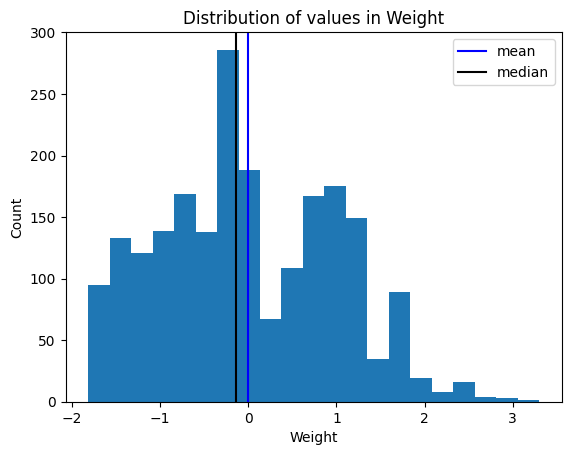

In [24]:
plot_distribution(data, "Weight")

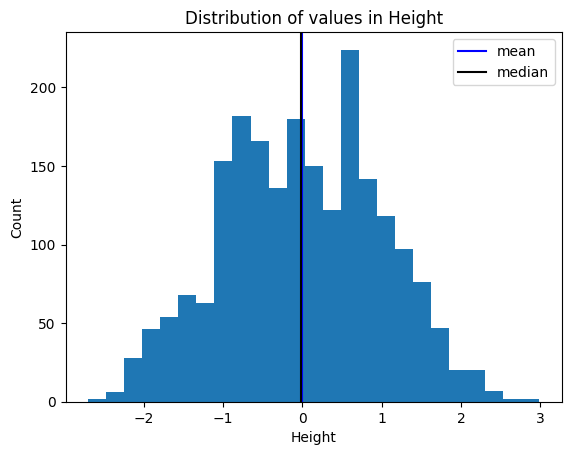

In [25]:
plot_distribution(data, "Height")

In [31]:
data["family_history_with_overweight_yes"].value_counts()

family_history_with_overweight_yes
True     1726
False     385
Name: count, dtype: int64

From above data we get to know that 1726 people run their families with overweight and 385 don't run their families.

In [ ]:
#correlation matrix
corr_matrix = data.corr()
print(data.columns)  

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')


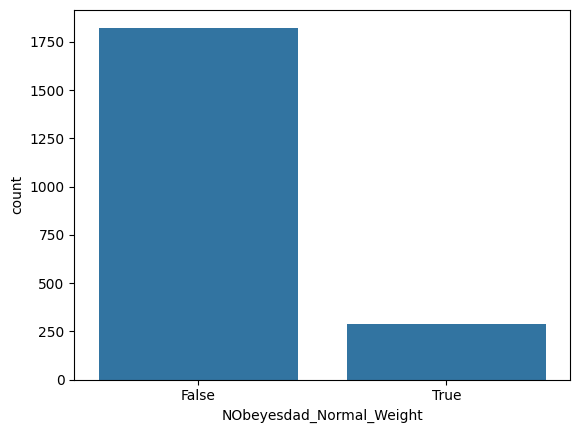

In [33]:
target_column = 'NObeyesdad_Normal_Weight'  
sns.countplot(x=target_column, data=data)
plt.show()

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_20120\1387705667.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=cat_variable, data=dataset, palette="Blues_r", order=order)


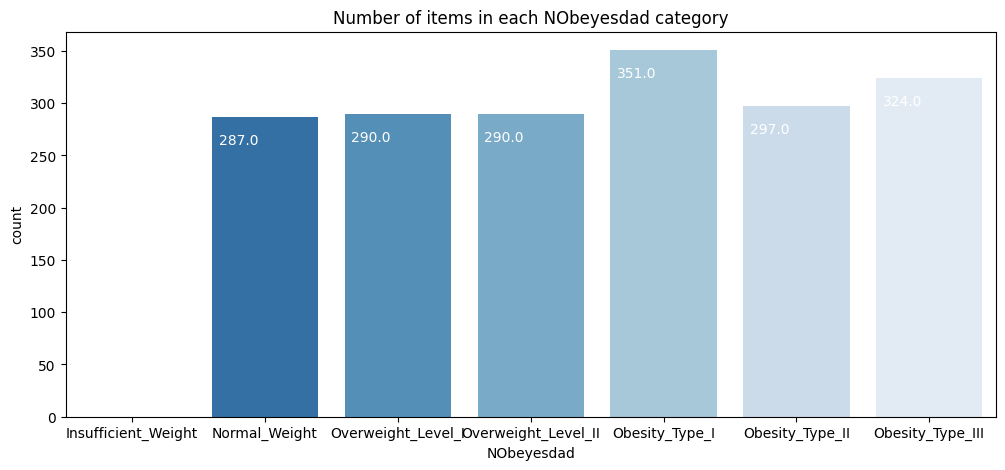

In [ ]:
# Creating a new column 'NObeyesdad' by combining existing binary columns
def consolidate_NObeyesdad(data):
    conditions = [
        (data['NObeyesdad_Normal_Weight'] == 1, 'Normal_Weight'),
        (data['NObeyesdad_Obesity_Type_I'] == 1, 'Obesity_Type_I'),
        (data['NObeyesdad_Obesity_Type_II'] == 1, 'Obesity_Type_II'),
        (data['NObeyesdad_Obesity_Type_III'] == 1, 'Obesity_Type_III'),
        (data['NObeyesdad_Overweight_Level_I'] == 1, 'Overweight_Level_I'),
        (data['NObeyesdad_Overweight_Level_II'] == 1, 'Overweight_Level_II'),
    ]
    
    for condition, label in conditions:
        data.loc[condition, 'NObeyesdad'] = label

consolidate_NObeyesdad(data)

#custom function to count and plot values
def count_values(dataset, cat_variable, order=None):
    ax = sns.countplot(x=cat_variable, data=dataset, palette="Blues_r", order=order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x() + 0.2, p.get_height()), 
                    ha="center", va="top", color="white", size=10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()


categories_order = [
    "Insufficient_Weight", "Normal_Weight", "Overweight_Level_I",
    "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"
]

plt.figure(figsize=(12, 5))

# Calling the function with the dataset, column name, and specified order
count_values(data, "NObeyesdad", order=categories_order)


People, according to their `Body mass index (BMI)`, are categorised as:

* Underweight if BMI < 18.5
* Normal if BMI 18.5 - 24.9 
* Overweight if BMI 25.0 - 29.9
* Obesity I if BMI 30.0 - 34.9
* Obesity II if BMI 35.0 to 39.9
* Obesity III if BMI > 40

Number of people per category is displayed below (note: categories are ordered logically).

The plot shows the dataset is balanced; only "Obese Type I" class slightly outnumber the other categories.

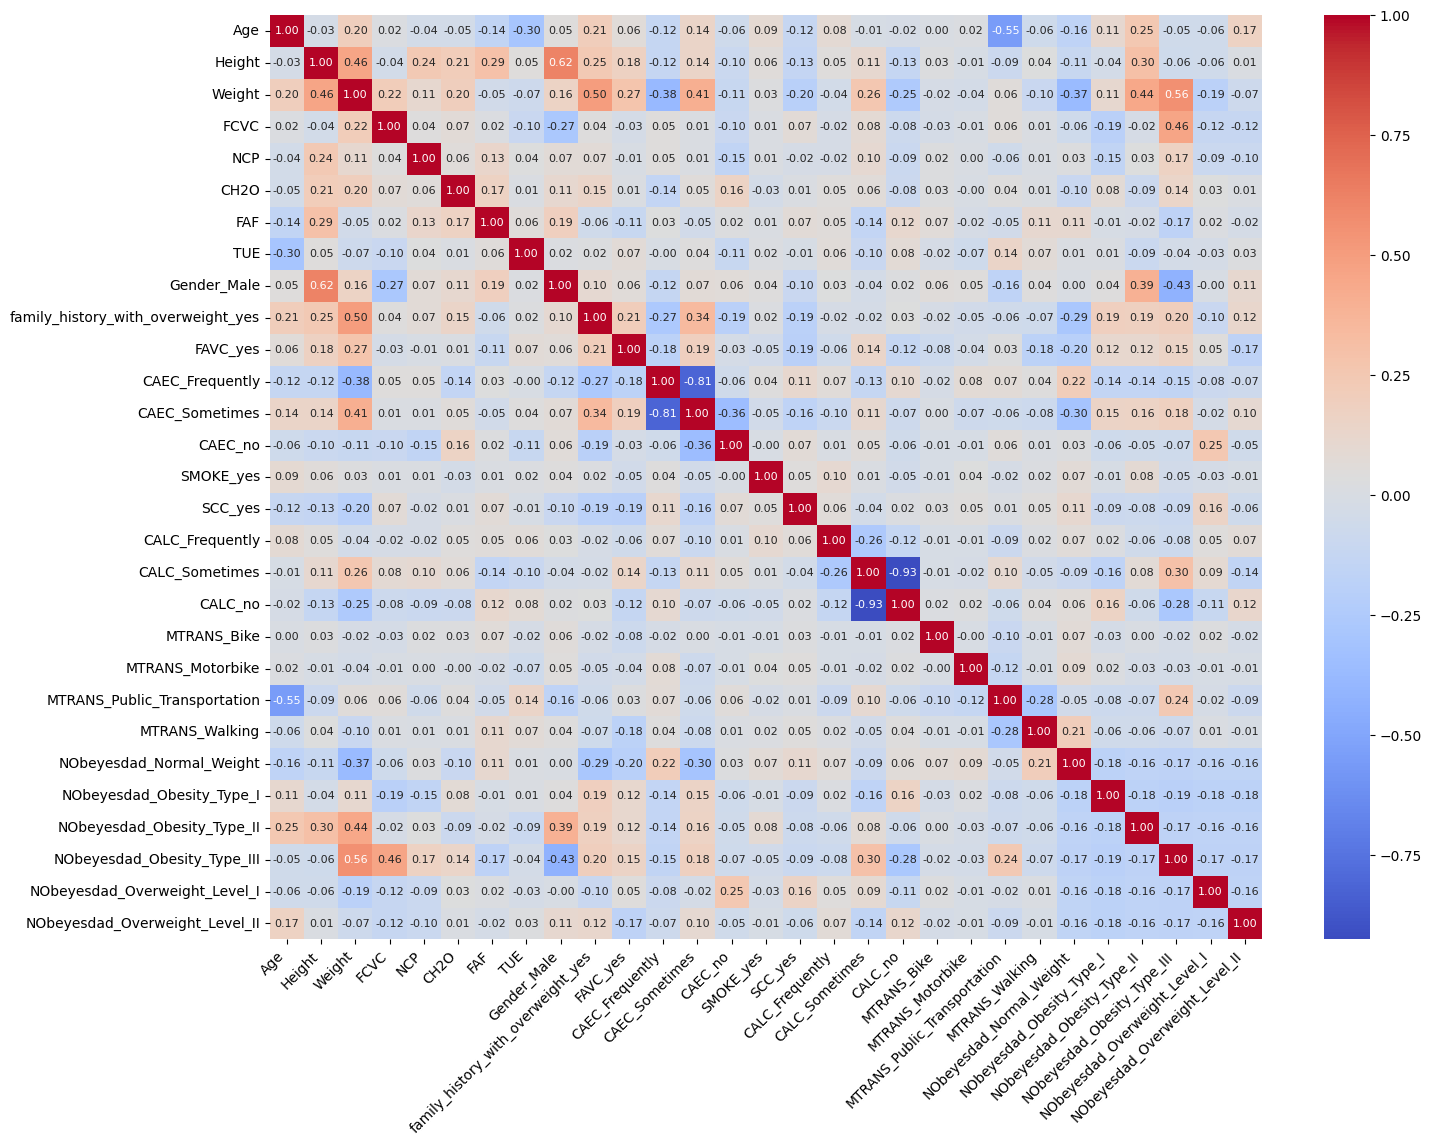

In [ ]:
# Computing and visualizing the correlation matrix
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

<h1>Feature Engineering</h1>

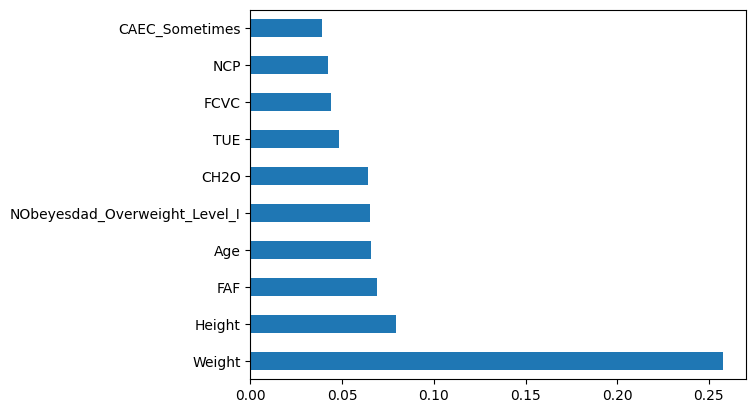

In [34]:
# Feature Engineering
X = data.drop(columns=[target_column])
y = data[target_column]
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


<h1>Model Development</h1>

Classification Report for Decision Tree:

              precision    recall  f1-score   support

       False       0.98      0.99      0.98       361
        True       0.93      0.89      0.91        62

    accuracy                           0.97       423
   macro avg       0.96      0.94      0.95       423
weighted avg       0.97      0.97      0.97       423



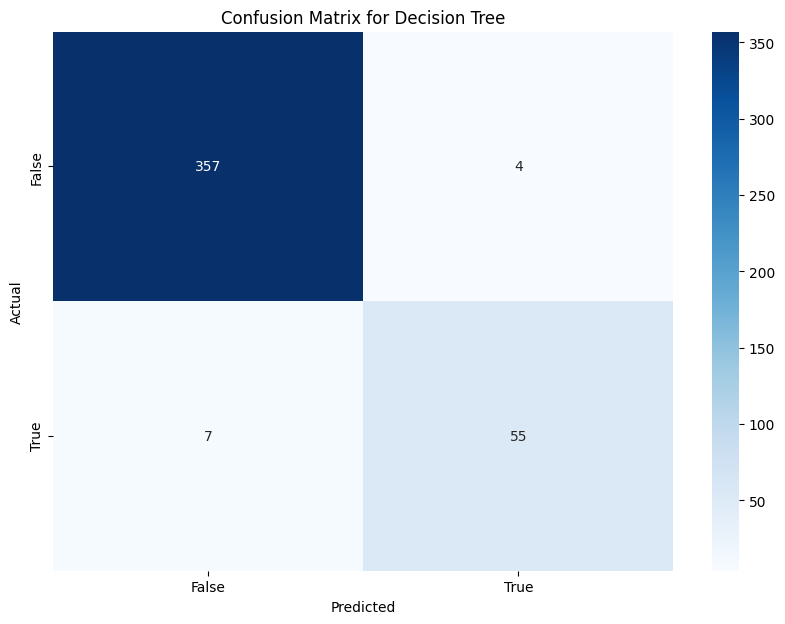

Classification Report for Random Forest:

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       361
        True       0.97      0.92      0.94        62

    accuracy                           0.98       423
   macro avg       0.98      0.96      0.97       423
weighted avg       0.98      0.98      0.98       423



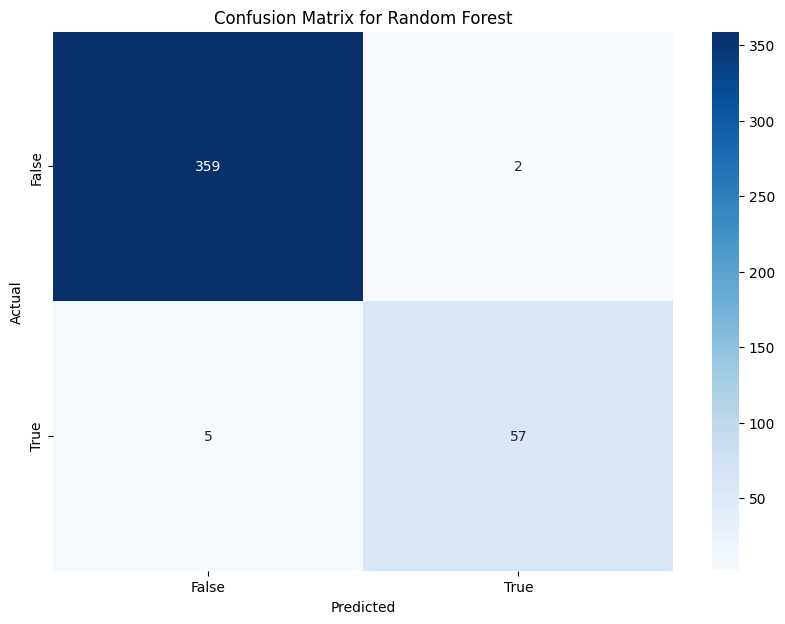

Classification Report for SVM:

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       361
        True       0.95      0.58      0.72        62

    accuracy                           0.93       423
   macro avg       0.94      0.79      0.84       423
weighted avg       0.93      0.93      0.93       423



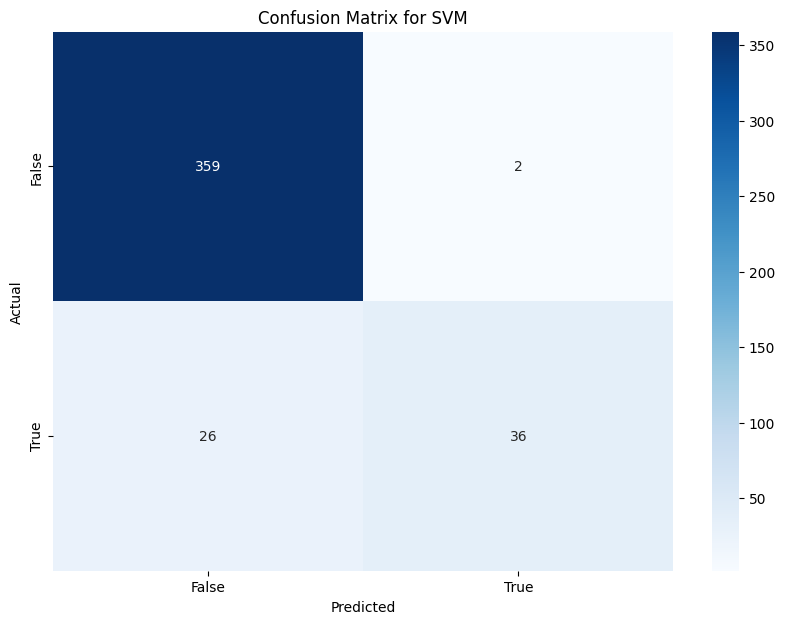

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

       False       0.90      1.00      0.95       361
        True       1.00      0.39      0.56        62

    accuracy                           0.91       423
   macro avg       0.95      0.69      0.75       423
weighted avg       0.92      0.91      0.89       423



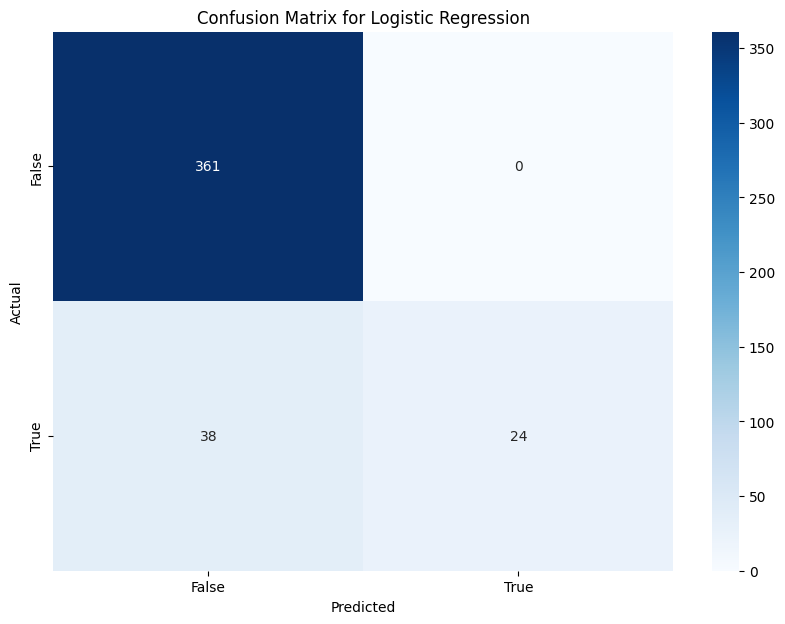

In [35]:
# Model Development
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #classification report
    print(f'Classification Report for {name}:\n')
    print(classification_report(y_test, y_pred))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

Based on the results, the most important features contributing to obesity levels are:

1. Weight: Weight has a strong positive correlation with obesity levels. This suggests that individuals with higher weights are more likely to have higher obesity levels.

2. NObeyesdad_Obesity_Type_I: This feature indicates whether an individual belongs to Obesity Type I category. It has a positive correlation with obesity levels, indicating that individuals in this category are more likely to have higher obesity levels.

3. NObeyesdad_Obesity_Type_II: Similar to the previous feature, this feature indicates whether an individual belongs to Obesity Type II category. It also has a positive correlation with obesity levels.

4. NObeyesdad_Obesity_Type_III: This feature indicates whether an individual belongs to Obesity Type III category. It has the highest positive correlation with obesity levels among the three obesity types.

5. CH2O: CH2O represents the amount of water consumed daily. It has a negative correlation with obesity levels, suggesting that individuals who consume more water are less likely to have higher obesity levels.

6. FCVC: FCVC represents the consumption of vegetables and fruits. It has a negative correlation with obesity levels, indicating that individuals who consume more vegetables and fruits are less likely to have higher obesity levels.

7. FAF: FAF represents the frequency of physical activity. It has a negative correlation with obesity levels, suggesting that individuals who engage in more physical activity are less likely to have higher obesity levels.

These findings have important implications for health recommendations. It highlights the significance of maintaining a healthy weight, consuming a balanced diet with an emphasis on fruits and vegetables, staying physically active, and drinking an adequate amount of water. Health interventions and recommendations should focus on promoting these behaviors to prevent and manage obesity. Additionally, the findings emphasize the importance of addressing different types of obesity, as individuals in Obesity Type II and Type III categories are at higher risk and may require targeted interventions.